In [1]:
import pandas as pd 
from sklearn.metrics import pairwise, r2_score
from scipy.stats import pearsonr
import seaborn as sns 
import matplotlib.pyplot as plt  
from matplotlib.lines import Line2D
import numpy as np
import os
os.chdir('/u/venia/reddit_methods')
plt.rcParams['font.family'] = 'arial'


##### this is all preparing the data for the plot
df = pd.read_csv('data/url_sample.csv')
df = df.drop_duplicates(subset=['id'])

# scores_old = pd.read_csv('data\\cultural_scores.csv')
scores = pd.read_csv('/u/venia/data/scores_z.csv')

dimen_list = [k for k in scores.columns if k != 'community']


In [24]:
df[(df['domain'] =='redditinc.com') & (df['subreddit'] =='The_Donald')]

,Unnamed: 0,id,parent_id,score,link_id,author,subreddit,created_utc,domain,url
2747642,3550420,t1_ed9yihz,t1_ed9uuy7,78,t3_acomtk,Oxi-glo,The_Donald,1546660469,redditinc.com,https://www.redditinc.com/policies/content-policy
2762929,3570008,t1_edainu0,t1_ed9n07f,3,t3_acomtk,EbonicsCorrector,The_Donald,1546684861,redditinc.com,https://www.redditinc.com/policies/content-policy
3429624,4436951,t1_ee14nry,t1_ee14f65,2,t3_afqmpa,Terkala,The_Donald,1547443854,redditinc.com,https://www.redditinc.com/policies/moderator-g...
4830442,6252822,t1_eypcg6l,t3_cy30fa,1,t3_cy30fa,AutoModerator,The_Donald,1567296140,redditinc.com,https://www.redditinc.com/policies/content-policy
4830832,6253313,t1_eypcxyx,t3_cy32ug,1,t3_cy32ug,AutoModerator,The_Donald,1567296538,redditinc.com,https://www.redditinc.com/policies/content-policy
...,...,...,...,...,...,...,...,...,...,...
7612815,9891980,t1_f21o9ro,t3_dbhjzh,1,t3_dbhjzh,AutoModerator,The_Donald,1569874621,redditinc.com,https://www.redditinc.com/policies/content-policy
7612838,9892013,t1_f21ob5x,t3_dbhk4z,1,t3_dbhk4z,AutoModerator,The_Donald,1569874636,redditinc.com,https://www.redditinc.com/policies/content-policy
7612842,9892017,t1_f21ob85,t3_dbhk5b,1,t3_dbhk5b,AutoModerator,The_Donald,1569874637,redditinc.com,https://www.redditinc.com/policies/content-policy
7612901,9892095,t1_f21oena,t3_dbhki9,1,t3_dbhki9,AutoModerator,The_Donald,1569874672,redditinc.com,https://www.redditinc.com/policies/content-policy


In [25]:
df[(df['domain'] =='redditinc.com')].groupby('subreddit')['author'].count().sort_values()

subreddit
3Dprinting                1
explainlikeimfive         1
exoticspotting            1
drumcorps                 1
discordapp                1
                      ...  
canada                   69
Market76                 79
Dresses                 180
AustralianPolitics      647
The_Donald            55242
Name: author, Length: 393, dtype: int64

In [3]:
data = pd.merge(df, scores, left_on = 'subreddit',right_on='community')
corp_scores = data.groupby('domain')[dimen_list].agg({'mean':})

In [12]:
corp_scores2 = pd.merge(corp_scores, df.groupby('domain')['id'].count(), left_index=True, right_index=True)

In [14]:
corp_scores2['count'] = corp_scores2['id']
corp_scores2.drop('id', axis=1,inplace=True)


FileNotFoundError: [Errno 2] No such file or directory: 'reddit_methods/data/domain_cultural.csv'

In [15]:
corp_scores2.to_csv("data/domain_cultural.csv")

In [20]:
corp_scores.reset_index(inplace=True)
corp_scores = pd.melt(corp_scores, id_vars=['Company'])

corp_scores.columns = ['Company','dimension','score']

vals = corp_scores

vals = vals.sort_values(by='score', ascending=True)
vals['score'] = vals['score']

dimen_list = ['age', 'partisan', 'gender', 'affluence', 'sociality', 'partisan_neutral']



vals = vals[vals['dimension'].isin(dimen_list)]


# vals.to_csv("data\\genre_cultural_feats_f.csv")


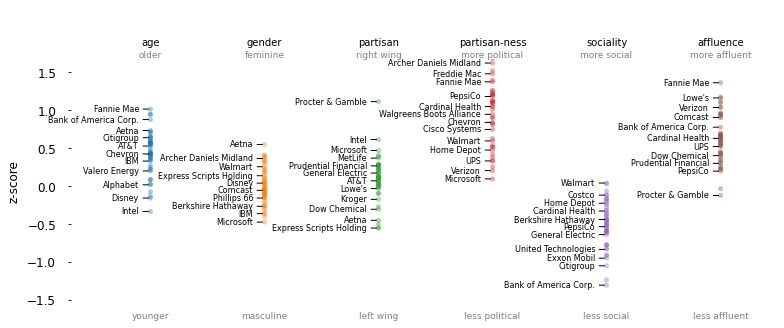

In [26]:
# vals = pd.read_csv("data\\genre_cultural_feats_f.csv")

# vals.columns = ['Unnamed: 0','genre','dimension','standardized score']
vals.columns = ['company','dimension','standardized score']
vals['dimension'] = vals['dimension'].apply(lambda x: x if x != 'partisan_neutral' else 'partisan-ness')


custom_dict = {'age': 0, 'gender': 1, 'partisan':2,'partisan-ness': 3, 'sociality': 4, 'affluence':5} 
vals = vals.sort_values(by=['dimension','standardized score'], key=lambda x: x.map(custom_dict))


fig, ax = plt.subplots(1, figsize = (11,4.7))

sns.stripplot(x=vals['dimension'],y=vals['standardized score'], jitter = False, ax=ax, orient='v', alpha = 0.4, linewidth=0)
dimen_list = list(vals['dimension'].unique())
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(pad = 11,bottom=False)
color = "#808080"
fontsize= 9
ha = 'center'
# ax.text(3,-.08,'less political', color=color, fontsize=fontsize, ha = ha)
# ax.text(3,1.08,'more political', color=color, fontsize=fontsize, ha = ha)
# ax.text(2,-.08,'left wing', color=color, fontsize=fontsize, ha = ha)
# ax.text(2,1.08,'right wing', color=color, fontsize=fontsize, ha = ha)
# ax.text(0,-.08,'younger', color=color, fontsize=fontsize, ha = ha)
# ax.text(0,1.08,'older', color=color, fontsize=fontsize, ha = ha)
# ax.text(1,-.08,'masculine', color=color, fontsize=fontsize, ha = ha)
# ax.text(1,1.08,'feminine', color=color, fontsize=fontsize, ha = ha)
# ax.text(4,-.08,'less social', color=color, fontsize=fontsize, ha = ha)
# ax.text(4,1.08,'more social', color=color, fontsize=fontsize, ha = ha)
# ax.text(5,-.08,'less affluent', color=color, fontsize=fontsize, ha = ha)
# ax.text(5,1.08,'more affluent', color=color, fontsize=fontsize, ha = ha)

# XTICKS ON BOTTOM
# ax.text(3,-1.75,'less political', color=color, fontsize=fontsize, ha = ha)
# ax.text(3,1.55,'more political', color=color, fontsize=fontsize, ha = ha)
# ax.text(2,-1.75,'left wing', color=color, fontsize=fontsize, ha = ha)
# ax.text(2,1.55,'right wing', color=color, fontsize=fontsize, ha = ha)
# ax.text(0,-1.75,'younger', color=color, fontsize=fontsize, ha = ha)
# ax.text(0,1.55,'older', color=color, fontsize=fontsize, ha = ha)
# ax.text(1,-1.75,'masculine', color=color, fontsize=fontsize, ha = ha)
# ax.text(1,1.55,'feminine', color=color, fontsize=fontsize, ha = ha)
# ax.text(4,-1.75,'less social', color=color, fontsize=fontsize, ha = ha)
# ax.text(4,1.55,'more social', color=color, fontsize=fontsize, ha = ha)
# ax.text(5,-1.75,'less affluent', color=color, fontsize=fontsize, ha = ha)
# ax.text(5,1.55,'more affluent', color=color, fontsize=fontsize, ha = ha)

ax.text(3,-1.75,'less political', color=color, fontsize=fontsize, ha = ha)
ax.text(3,1.7,'more political', color=color, fontsize=fontsize, ha = ha)
ax.text(2,-1.75,'left wing', color=color, fontsize=fontsize, ha = ha)
ax.text(2,1.7,'right wing', color=color, fontsize=fontsize, ha = ha)
ax.text(0,-1.75,'younger', color=color, fontsize=fontsize, ha = ha)
ax.text(0,1.7,'older', color=color, fontsize=fontsize, ha = ha)
ax.text(1,-1.75,'masculine', color=color, fontsize=fontsize, ha = ha)
ax.text(1,1.7,'feminine', color=color, fontsize=fontsize, ha = ha)
ax.text(4,-1.75,'less social', color=color, fontsize=fontsize, ha = ha)
ax.text(4,1.7,'more social', color=color, fontsize=fontsize, ha = ha)
ax.text(5,-1.75,'less affluent', color=color, fontsize=fontsize, ha = ha)
ax.text(5,1.7,'more affluent', color=color, fontsize=fontsize, ha = ha)

# -1.65,1.55
ax.xaxis.set_ticks_position('top')

y_old = {key:value for (key,value) in zip(dimen_list, vals.groupby('dimension')['standardized score'].min().T[custom_dict.keys()].T.values-1)}
y_max = {key:value for (key,value) in zip(dimen_list, vals.groupby('dimension')['standardized score'].max().T[custom_dict.keys()].T.values)}

# y_old = {key:value for (key,value) in zip(dimen_list, np.zeros(len(dimen_list))-1)}
# y_max = {key:value for (key,value) in zip(dimen_list, np.ones(len(dimen_list)))}


for i in range(len(vals)):
    x = vals['dimension'].values[i]
    y = vals['standardized score'].values[i]
    s = vals['company'].values[i]
    if y == y_max[x]:
        ax.annotate(text= s, xy= (dimen_list.index(x),y), xytext= (dimen_list.index(x)- 0.1, y), horizontalalignment='right', arrowprops=dict(arrowstyle='-'), fontsize=8, color='black', verticalalignment='center')
#     if y == y_min[x]:
#         ax.annotate(text= s, xy= (dimen_list.index(x),y), xytext= (dimen_list.index(x)- 0.1, y), horizontalalignment='right', arrowprops=dict(arrowstyle='-'), fontsize=8, color='black', verticalalignment='center')
    elif (abs(y - y_old[x]) >= 0.092) & (abs(y-y_max[x])>=0.092): #& ((s!='K-pop 2') | (x != 'partisan')) & ((s!='synthwave') | (x != 'age')):
        ax.annotate(text= s, xy= (dimen_list.index(x),y), xytext= (dimen_list.index(x)- 0.1, y), horizontalalignment='right', arrowprops=dict(arrowstyle='-'), fontsize=8, color='black', verticalalignment='center')
        y_old[x] = y
    else:
        pass


for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12) 

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    tick.sticky_edges.x[:] = (-.3, 5)


plt.ylabel('z-score', fontsize = 12, labelpad = 7)
# ax.axis((-.72,5.5,-0.05,1.05))
ax.axis((-.7,5.5,-1.55,1.68)) 
ax.tick_params(axis='x', which='major', length=0)
plt.xlabel(None)
plt.tight_layout()
plt.savefig('corporations_cultural-dimensions.pdf', dpi = 300,bbox_inches = 'tight')
plt.show()
